# Analyzing Historical Stock/Revenue Data and Building a Dashboard

## 1. Question 1: Extracting Tesla Stock Data Using yfinance
Reset the index, save, and display the first five rows of the `tesla_data` dataframe.

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla = yf.Ticker("TSLA")
print(tesla)

yfinance.Ticker object <TSLA>


In [3]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [4]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2. Question 2: Extracting Tesla Revenue Data Using Webscraping
Display the last five rows of the `tesla_revenue` dataframe.

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
tesla_html_data = requests.get(url, headers=headers).text
print(tesla_html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtra

In [7]:
soup = BeautifulSoup(tesla_html_data, "html5lib")

In [8]:
# Find out the table index within the html
tables = soup.find_all("table")

for idx, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = idx

In [9]:
print(table_index)

1


In [10]:
table_data = {"Date": [], "Revenue": []}

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        new_row = pd.Series({"Date": date, "Revenue": revenue})
        table_data["Date"].append(date)
        table_data["Revenue"].append(revenue)

tesla_revenue = pd.DataFrame(table_data)

In [11]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

In [12]:
tesla_revenue.tail()

,Date,Revenue
51,2010-09-30,31
52,2010-06-30,28
53,2010-03-31,21
55,2009-09-30,46
56,2009-06-30,27


In [126]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].map(int)

C:\Users\kulin\AppData\Local\Temp\ipykernel_5092\3376658281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
C:\Users\kulin\AppData\Local\Temp\ipykernel_5092\3376658281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].map(int)


## 3. Question 3: Use GameStop Stock Data Using yfinance
Reset the index, save, and display the first five rows of the `gme_data` dataframe.

In [13]:
gme = yf.Ticker("GME")
print(gme)

yfinance.Ticker object <GME>


In [14]:
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

In [15]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4. Question 4: Extracting GameStop Revenue Data Using Webscraping
Display the last five rows of the `gme_revenue` dataframe.

In [16]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
gme_html_data = requests.get(url, headers=headers).text
print(gme_html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" />
		<title>GameStop Revenue 2010-2023 | GME | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="GameStop annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are

In [17]:
soup = BeautifulSoup(gme_html_data, "html5lib")

In [18]:
# Find out the table index within the html
tables = soup.find_all("table")

for idx, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        table_index = idx

In [19]:
print(table_index)

1


In [20]:
table_data = {"Date": [], "Revenue": []}

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        new_row = pd.Series({"Date": date, "Revenue": revenue})
        table_data["Date"].append(date)
        table_data["Revenue"].append(revenue)

gme_revenue = pd.DataFrame(table_data)

In [21]:
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

In [22]:
gme_revenue.tail()

,Date,Revenue
53,2010-01-31,3524
54,2009-10-31,1835
55,2009-07-31,1739
56,2009-04-30,1981
57,2009-01-31,3492


## 5. Question 5: Tesla Stock and Revenue Dashboard
Graph of Tesla Stock and Revenue data.

In [23]:
import matplotlib.pyplot as plt

In [24]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].map(int)

In [25]:
tesla_revenue.sort_values(by="Date", inplace=True)

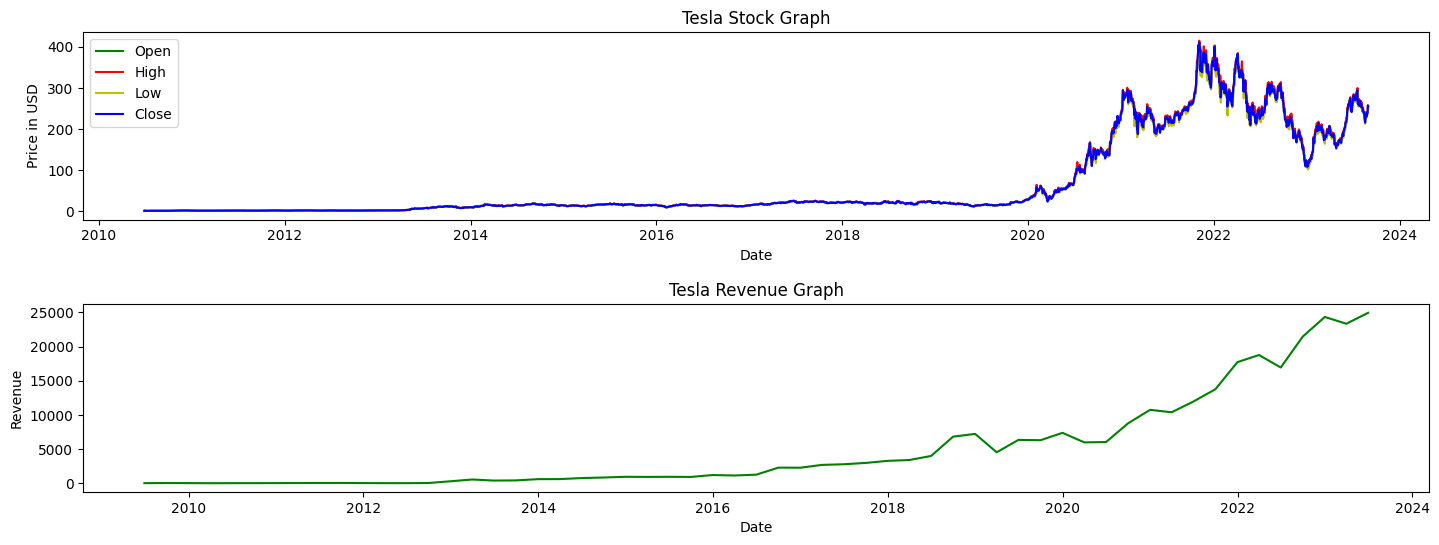

In [39]:
# Plotting Stock Data
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
fig.tight_layout(pad=4)

ax[0].set_title('Tesla Stock Graph')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price in USD')
ax[0].plot(tesla_data['Date'], tesla_data['Open'], label='Open', color='g')
ax[0].plot(tesla_data['Date'], tesla_data['High'], label='High', color='r')
ax[0].plot(tesla_data['Date'], tesla_data['Low'], label='Low', color='y')
ax[0].plot(tesla_data['Date'], tesla_data['Close'], label='Close', color='b')
ax[0].legend(loc='upper left');

ax[1].plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green')
ax[1].set_title('Tesla Revenue Graph')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue');

## 6. Question 6: GameStop Stock and Revenue Dashboard

In [27]:
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = gme_revenue["Revenue"].map(int)

In [28]:
tesla_revenue.sort_values(by="Date", inplace=True)

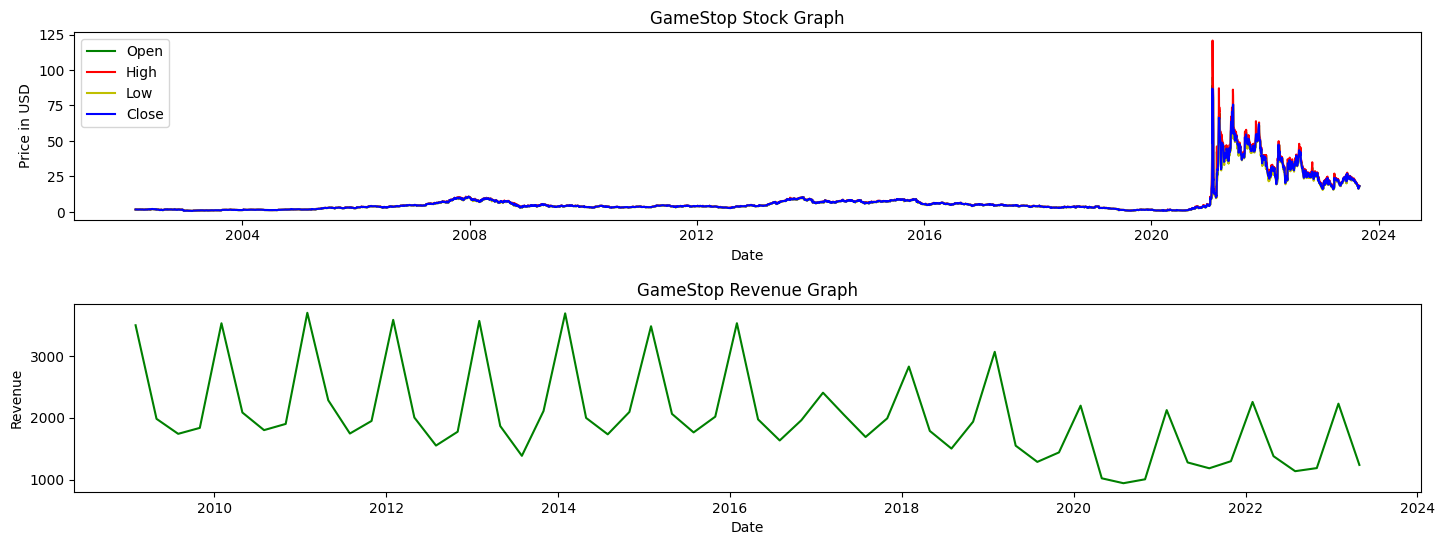

In [42]:
# Plotting Stock Data
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
fig.tight_layout(pad=4)

ax[0].set_title('GameStop Stock Graph')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price in USD')
ax[0].plot(gme_data['Date'], gme_data['Open'], label='Open', color='g')
ax[0].plot(gme_data['Date'], gme_data['High'], label='High', color='r')
ax[0].plot(gme_data['Date'], gme_data['Low'], label='Low', color='y')
ax[0].plot(gme_data['Date'], gme_data['Close'], label='Close', color='b')
ax[0].legend(loc='upper left');

ax[1].plot(gme_revenue['Date'], gme_revenue['Revenue'], color='green')
ax[1].set_title('GameStop Revenue Graph')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue');